# **Project Name**    - Credit Card Transaction Fraud Detection



##### **Project Type**    - Classification
##### **Team Lead**    - Sanu Satyam
###### **Team Member 1 -** Gaurav Srivastava
###### **Team Member 2 -** Krishna Kumar G
###### **Team Member 3 -** Mohit Gupta
###### **Team Member 4 -** Md. yasir
###### **Team Member 5 -** Panchmurthi Bhargavi
###### **Team Member 6 -** Shefali Pandey
###### **Team Member 7 -** Vamsi Kopparthi

# **Problem Statement**


**Write Problem Statement Here.**

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
data = pd.read_csv("/content/fraud_data.csv")

### Dataset First View

In [ ]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,name,gender,street,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,01-01-2019 06:02,3.007470e+13,fraud_Lockman Ltd,grocery_pos,212.75,Kelsey Richards,F,889 Sarah Station Suite 624,Holcomb,KS,37.9931,-100.9893,2691,Arboriculturist,16-08-1993,d9dcde500bed2cad48ee41e44c362596,1325377935,38.862183,-101.234087,0
1,01-01-2019 06:04,3.553630e+15,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon Johnson,F,7202 Jeffrey Mills,Conway,WA,48.3400,-122.3456,85,"Research officer, political party",01-09-1984,9b7a0619dcc5c572dc134f2827ed5a6b,1325378050,48.682111,-122.719904,0
2,01-01-2019 06:20,4.512830e+18,fraud_Jaskolski-Dibbert,grocery_net,16.16,Monica Cohen,F,864 Reynolds Plains,Uledi,PA,39.8936,-79.7856,328,Tree surgeon,25-07-1983,514a1b5251ca91aeab8994cf6253f04b,1325379053,39.222743,-78.839099,0
3,01-01-2019 06:46,6.593250e+15,fraud_Brekke and Sons,gas_transport,55.18,Melissa Meza,F,244 Abbott Parkway,Loxahatchee,FL,26.7383,-80.2760,26551,Paramedic,04-01-1977,3c6158c556727d527f8b51cc03b30236,1325380612,27.346033,-80.475563,0
4,01-01-2019 06:52,4.018110e+18,fraud_Kuhn LLC,misc_net,6.36,Katherine Love,F,5884 Sandoval Square Apt. 371,Allenhurst,NJ,40.2367,-74.0067,1533,"Administrator, charities/voluntary organisations",15-04-1935,99b8d1e83b17dad071aedb850c3a8da9,1325380934,39.926556,-73.774415,0


### Dataset Rows & Columns count

In [ ]:
data.shape

(209651, 20)

### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209651 entries, 0 to 209650
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  209651 non-null  object 
 1   cc_num                 209651 non-null  float64
 2   merchant               209651 non-null  object 
 3   category               209651 non-null  object 
 4   amt                    209651 non-null  float64
 5   name                   209651 non-null  object 
 6   gender                 209651 non-null  object 
 7   street                 209651 non-null  object 
 8   city                   209651 non-null  object 
 9   state                  209651 non-null  object 
 10  lat                    209651 non-null  float64
 11  long                   209651 non-null  float64
 12  city_pop               209651 non-null  int64  
 13  job                    209651 non-null  object 
 14  dob                    209651 non-nu

#### Duplicate Values

In [ ]:
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
data.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
name                     0
gender                   0
street                   0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

The Dataset has 209651 rows and 20 columns. It has no duplicates and null values.

## ***2. Understanding Your Variables***

In [ ]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'name', 'gender', 'street', 'city', 'state', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [ ]:
data.describe()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.096510e+05,209651.000000,209651.000000,209651.000000,2.096510e+05,2.096510e+05,209651.000000,209651.000000,209651.000000
mean,4.146945e+17,89.583376,38.549583,-90.236515,8.904593e+04,1.358516e+09,38.548503,-90.237149,0.046034
std,1.305438e+18,212.000962,5.072616,13.761965,3.011289e+05,1.817933e+07,5.107879,13.771945,0.209558
min,6.041621e+10,1.000000,20.027100,-165.672300,2.300000e+01,1.325378e+09,19.027804,-166.669638,0.000000
25%,1.800360e+14,9.930000,34.668900,-96.798000,7.430000e+02,1.342961e+09,34.756059,-96.904540,0.000000
50%,3.519610e+15,49.180000,39.371600,-87.476900,2.456000e+03,1.356951e+09,39.375763,-87.459875,0.000000
75%,4.635330e+15,87.930000,41.948800,-80.175200,2.032800e+04,1.374411e+09,41.966234,-80.261122,0.000000
max,4.992350e+18,27119.770000,66.693300,-67.950300,2.906700e+06,1.388534e+09,67.510267,-66.956540,1.000000


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
data['dob'] = pd.to_datetime(data['dob'], utc=True)

In [ ]:
data.drop(['trans_date_trans_time','cc_num', 'street'],axis=1, inplace=True)

In [ ]:
data.shape

(209651, 17)

Changed the "trans_date_trans_time" & "dob" column into datetime datatype.
Dropped the "cc_num" & "street" column because it's not relevant for our data visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

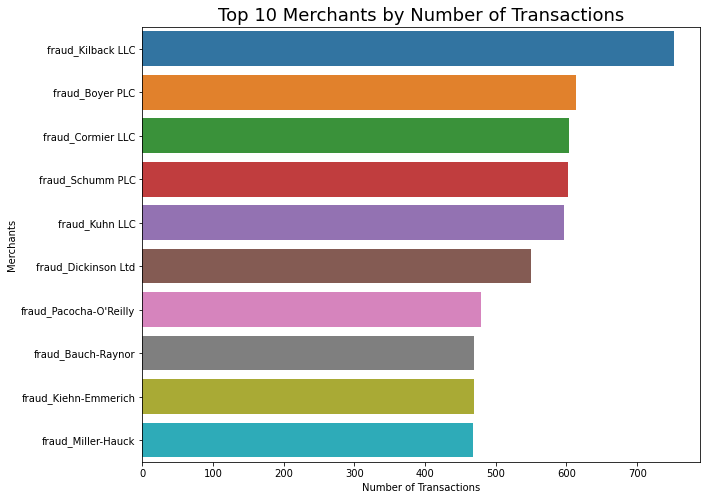

In [ ]:
#Top 10 merchants
merchants = data['merchant'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(y=merchants.index, x=merchants.values, data=data)
plt.title("Top 10 Merchants by Number of Transactions", fontsize=18)
plt.xlabel("Number of Transactions")
plt.ylabel("Merchants")
plt.show()

#### Chart - 2

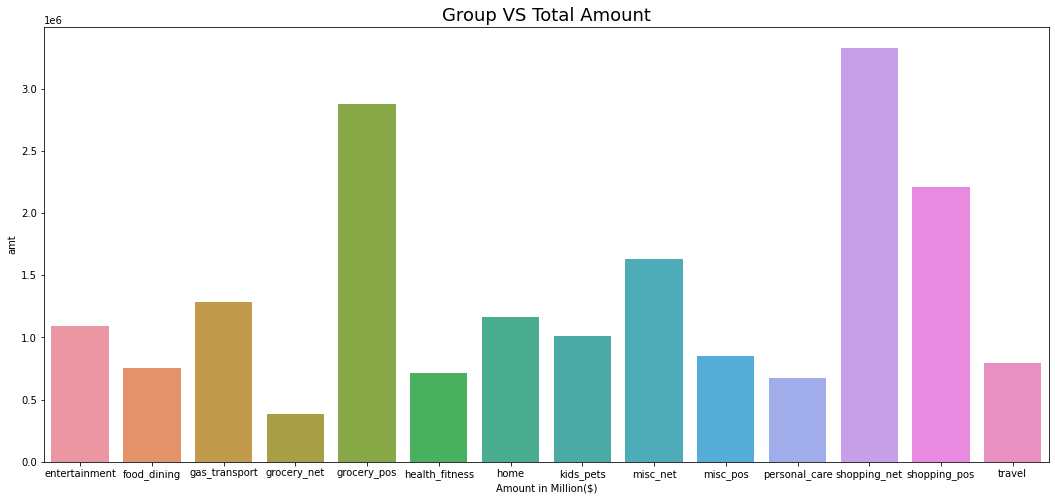

In [ ]:
#Category-wise Total Amount
cat = data.groupby('category')['amt'].sum().reset_index()
plt.figure(figsize=(18,8))
sns.barplot(x='category', y='amt', data=cat)
plt.title("Group VS Total Amount", fontsize= 18)
plt.xlabel("Amount in Million($)")
plt.show()

#### Chart - 3

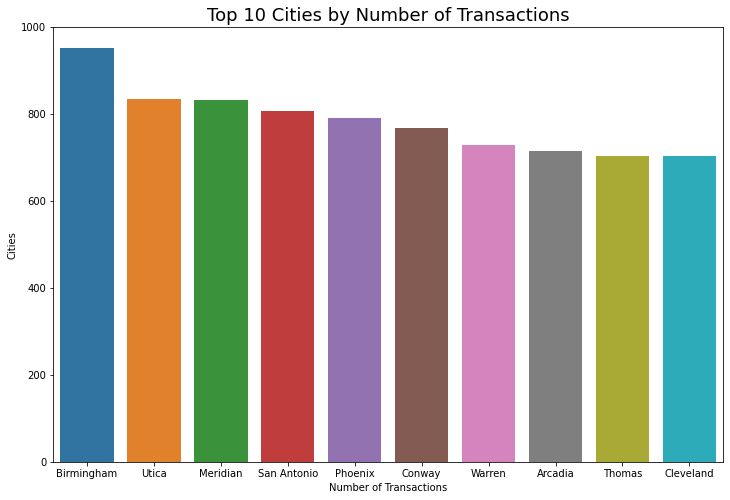

In [ ]:
#Top 10 Cities By Number of Transactions
city = data['city'].value_counts(ascending=False).head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=city.index, y=city.values, data=data)
plt.title("Top 10 Cities by Number of Transactions", fontsize=18)
plt.xlabel("Number of Transactions")
plt.ylabel("Cities")
plt.show()

#### Chart - 4

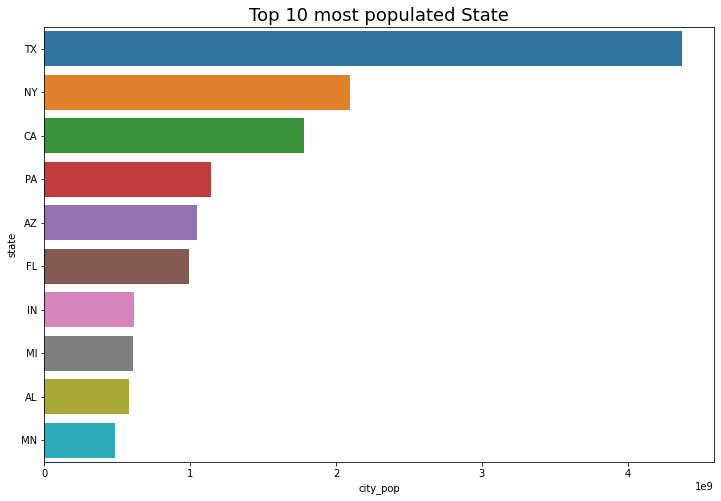

In [ ]:
#Top 10 most populated State
city_pop = data.groupby('state')['city_pop'].sum().reset_index()
city_pop = city_pop.sort_values(by='city_pop',ascending=False)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y='state', x='city_pop', data=city_pop)
plt.title("Top 10 most populated State", fontsize= 18)
plt.show()

#### Chart - 5

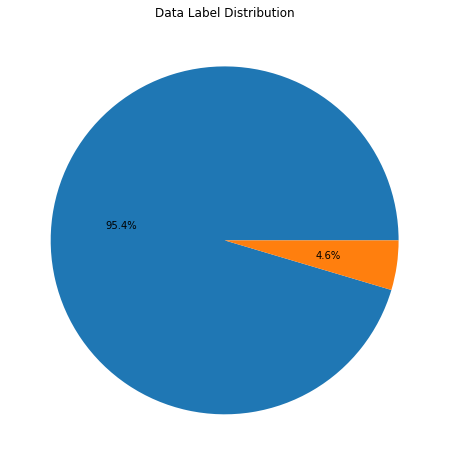

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data['is_fraud'].value_counts(),autopct= "%1.1f%%")
plt.title("Data Label Distribution")
plt.show()

#### Chart - 6

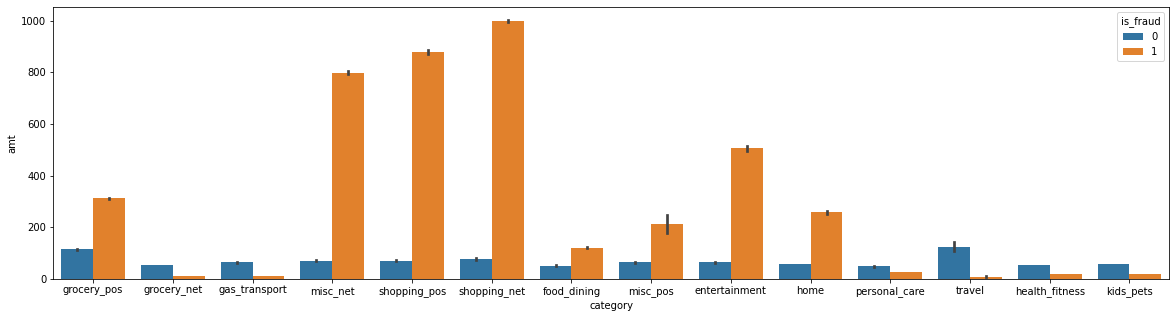

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'category', y = 'amt', hue = 'is_fraud', data = data,)
plt.show()

#### Chart - 7

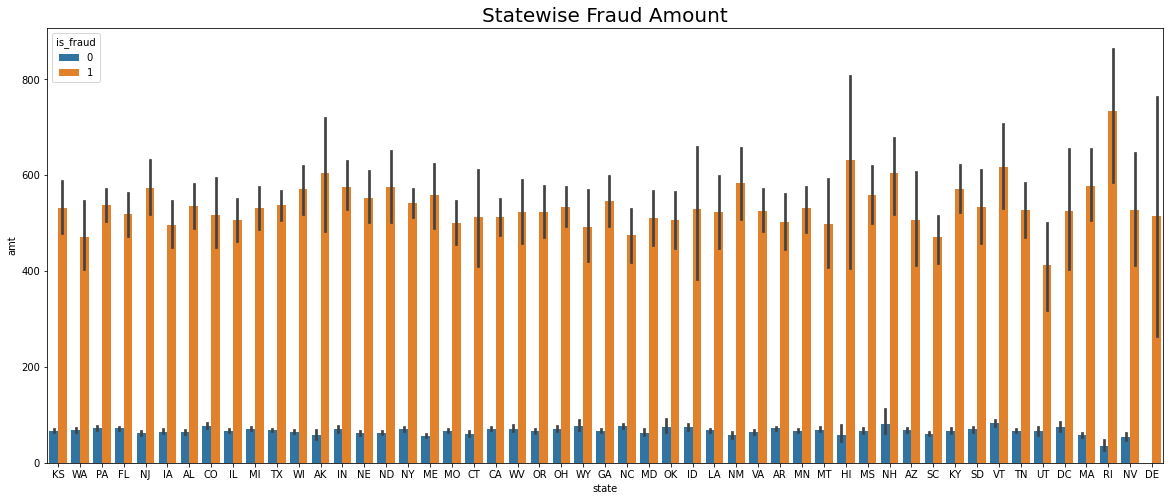

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'state', y = 'amt', hue = 'is_fraud', data = data)
plt.title("Statewise Fraud Amount", fontsize=20)
plt.show()

#### Chart - 8

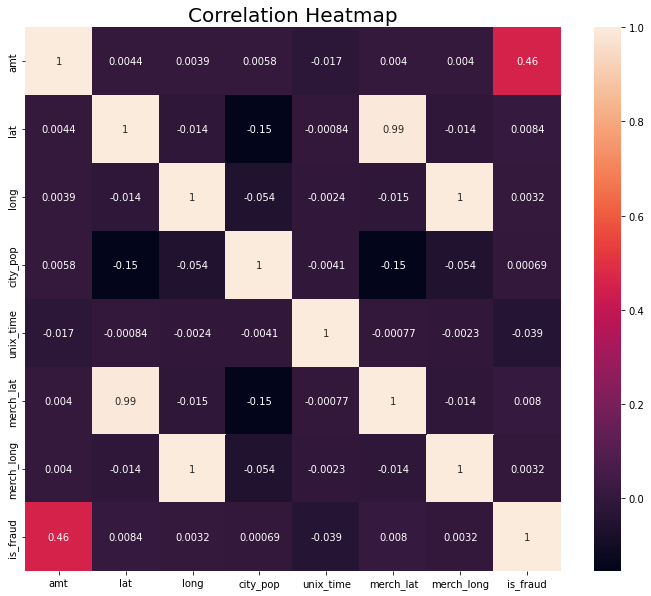

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

#### 1. Feature Manipulation

In [ ]:
#Creating a new Feature Age
from datetime import datetime
today = datetime.today()
today.year
data['age'] = today.year - data['dob'].dt.year
data.head(3)

,merchant,category,amt,name,gender,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,fraud_Lockman Ltd,grocery_pos,212.75,Kelsey Richards,F,Holcomb,KS,37.9931,-100.9893,2691,Arboriculturist,1993-08-16 00:00:00+00:00,d9dcde500bed2cad48ee41e44c362596,1325377935,38.862183,-101.234087,0,30
1,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon Johnson,F,Conway,WA,48.3400,-122.3456,85,"Research officer, political party",1984-01-09 00:00:00+00:00,9b7a0619dcc5c572dc134f2827ed5a6b,1325378050,48.682111,-122.719904,0,39
2,fraud_Jaskolski-Dibbert,grocery_net,16.16,Monica Cohen,F,Uledi,PA,39.8936,-79.7856,328,Tree surgeon,1983-07-25 00:00:00+00:00,514a1b5251ca91aeab8994cf6253f04b,1325379053,39.222743,-78.839099,0,40


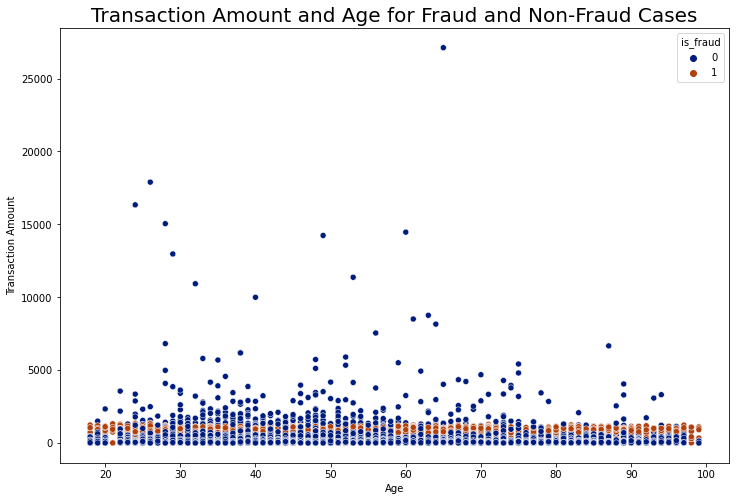

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age', y='amt', hue='is_fraud', data=data, palette = 'dark')
plt.title("Transaction Amount and Age for Fraud and Non-Fraud Cases", fontsize=20)
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.show()

#### 2. Feature Selection

In [ ]:
data = data[['category','gender','amt','lat','long','city_pop','merch_lat','merch_long','age','is_fraud']]

#### 3. Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
        if data[i].dtypes==("object"):
            label=le.fit_transform(data[i])
            data[i]=label 

In [ ]:
data.head()

,category,gender,amt,lat,long,city_pop,merch_lat,merch_long,age,is_fraud
0,4,0,212.75,37.9931,-100.9893,2691,38.862183,-101.234087,30,0
1,4,0,83.07,48.3400,-122.3456,85,48.682111,-122.719904,39,0
2,3,0,16.16,39.8936,-79.7856,328,39.222743,-78.839099,40,0
3,2,0,55.18,26.7383,-80.2760,26551,27.346033,-80.475563,46,0
4,8,0,6.36,40.2367,-74.0067,1533,39.926556,-73.774415,88,0


In [ ]:
data.shape

(209651, 10)

#### 4. Data Splitting

In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

#### 5. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_sc = scalar.fit_transform(X)

In [ ]:
X_sc

array([[-0.57803224, -0.90980258,  0.58097339, ...,  0.06141118,
        -0.79850482, -1.13251611],
       [-0.57803224, -0.90980258, -0.03072341, ...,  1.98392168,
        -2.35862353, -0.61691693],
       [-0.83308292, -0.90980258, -0.34633594, ...,  0.13200033,
         0.82763021, -0.55962814],
       ...,
       [-0.32298155,  1.09913956, -0.21610037, ...,  0.27376087,
        -0.07959548,  0.41428143],
       [ 1.7174239 ,  1.09913956, -0.38487359, ...,  1.15939239,
        -1.94916577,  0.47157022],
       [-1.59823496,  1.09913956, -0.24270408, ..., -0.45780477,
        -0.49370219, -1.13251611]])

#### 6. Dimesionality Reduction

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 20)
#X_pca = pca.fit_transform(X_sc)

In [ ]:
#X_pca.shape

#### 7. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(157238, 9)
(52413, 9)


#### 8. Handling Imbalanced Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

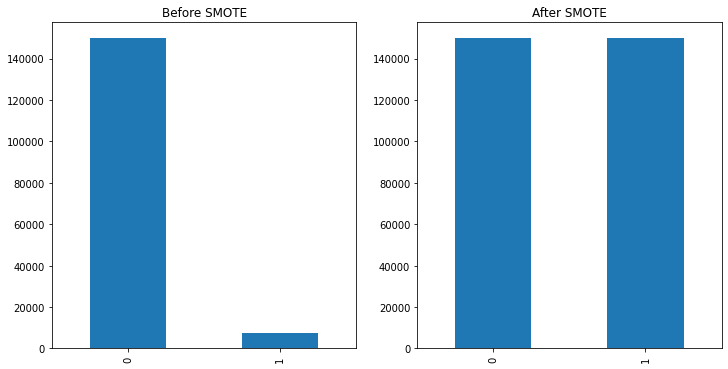

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(12, 6))

pd.Series(y_train).value_counts().plot.bar(ax=ax1)
ax1.set_title('Before SMOTE')
 
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)
ax2.set_title('After SMOTE') 
plt.show()

## ***6. ML Model Implementation***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

####  Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_new, y_train_new)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)

The Accuracy Score is:  0.9406826550664912
The Classification Report is: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     49994
           1       0.42      0.75      0.54      2419

    accuracy                           0.94     52413
   macro avg       0.70      0.85      0.75     52413
weighted avg       0.96      0.94      0.95     52413

The Confusion Matrix is: 


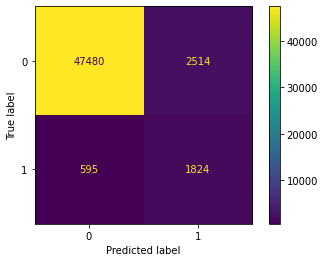

In [ ]:
print("The Accuracy Score is: ", accuracy_score(y_test, y_pred))
print("The Classification Report is: ")
print(classification_report(y_test, y_pred))
print("The Confusion Matrix is: ")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Random Forest Classifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [ ]:
y_pred1 = RF.predict(X_test)

The Accuracy Score is:  0.9798141682407037
The Classification Report is: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     49994
           1       0.73      0.88      0.80      2419

    accuracy                           0.98     52413
   macro avg       0.86      0.93      0.90     52413
weighted avg       0.98      0.98      0.98     52413

The Confusion Matrix is: 


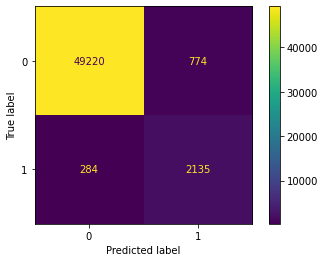

In [ ]:
print("The Accuracy Score is: ", accuracy_score(y_test, y_pred1))
print("The Classification Report is: ")
print(classification_report(y_test, y_pred1))
print("The Confusion Matrix is: ")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.show()

#### AdaBoost Classifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.01)

In [ ]:
ada.fit(X_train_new, y_train_new)

AdaBoostClassifier(learning_rate=0.01)

In [ ]:
y_pred2 = ada.predict(X_test)

The Accuracy Score is:  0.9607349321733157
The Classification Report is: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     49994
           1       0.56      0.75      0.64      2419

    accuracy                           0.96     52413
   macro avg       0.77      0.86      0.81     52413
weighted avg       0.97      0.96      0.96     52413

The Confusion Matrix is: 


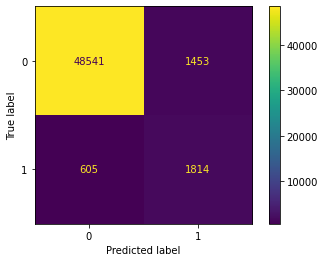

In [ ]:
print("The Accuracy Score is: ", accuracy_score(y_test, y_pred2))
print("The Classification Report is: ")
print(classification_report(y_test, y_pred2))
print("The Confusion Matrix is: ")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

**The Best predicting model is Random Forest with accuracy score of 98%.**

### **7. Saving the Best Predicted Model**

In [ ]:
import pickle

In [ ]:
#Saving the model in pickle file

pickle.dump(RF, open('RF_model', 'wb'))

In [ ]:
#Opening and Testing the Pickle Model
pickled_model = pickle.load(open('/content/RF_model', 'rb'))
pickled_model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test[:10]

152269    0
94538     0
209103    0
53052     0
132146    0
89615     0
145360    1
200911    0
59992     0
52726     0
Name: is_fraud, dtype: int64